Plan is to isloate the most likely variables to predict a swing and a miss

In [ ]:
from pybaseball import statcast
import pandas as pd
import numpy as np

In [71]:
statcast(start_dt="2019-06-24", end_dt="2019-06-25").columns

This is a large query, it may take a moment to complete


  0%|          | 0/2 [00:00<?, ?it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 50%|█████     | 1/2 [00:04<00:04,  4.74s/it]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
100%|██████████| 2/2 [00:09<00:00,  4.56s/it]


Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description',
       ...
       'batter_days_until_next_game', 'api_break_z_with_gravity',
       'api_break_x_arm', 'api_break_x_batter_in', 'arm_angle', 'attack_angle',
       'attack_direction', 'swing_path_tilt',
       'intercept_ball_minus_batter_pos_x_inches',
       'intercept_ball_minus_batter_pos_y_inches'],
      dtype='object', length=118)

In [72]:
statcast(start_dt="2019-06-24", end_dt="2019-06-25").head()

This is a large query, it may take a moment to complete


100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
3014,FF,2019-06-25,93.1,-2.33,5.21,"Festa, Matt",460075,670036,field_out,hit_into_play,...,1,1.41,0.69,0.69,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3046,SL,2019-06-25,87.0,-2.27,5.16,"Festa, Matt",592885,670036,strikeout,swinging_strike_blocked,...,1,2.39,-0.36,0.36,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3177,FF,2019-06-25,93.3,-2.59,4.93,"Festa, Matt",592885,670036,None,ball,...,1,1.44,0.5,-0.5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3294,FF,2019-06-25,93.3,-2.4,5.07,"Festa, Matt",592885,670036,None,foul,...,1,1.4,0.32,-0.32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3410,FF,2019-06-25,92.8,-2.62,5.05,"Festa, Matt",592885,670036,None,called_strike,...,1,1.48,0.38,-0.38,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


## EDA

In [73]:
statcast_df = statcast(start_dt="2019-06-24", end_dt="2019-07-25")
distinct_descriptions = statcast_df["description"].unique()
print(distinct_descriptions)
description_counts = statcast_df["description"].value_counts()
print(description_counts)


This is a large query, it may take a moment to complete


  3%|▎         | 1/32 [00:00<00:15,  2.03it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 16%|█▌        | 5/32 [00:05<00:28,  1.05s/it]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 22%|██▏       | 7/32 [00:06<00:22,  1.10it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureW

['swinging_strike' 'ball' 'foul' 'called_strike' 'hit_into_play'
 'foul_tip' 'blocked_ball' 'swinging_strike_blocked' 'hit_by_pitch'
 'foul_bunt' 'automatic_ball' 'pitchout' 'missed_bunt' 'bunt_foul_tip']
description
ball                       37808
foul                       20751
hit_into_play              19729
called_strike              18323
swinging_strike            12033
blocked_ball                2641
foul_tip                    1049
swinging_strike_blocked      927
automatic_ball               399
hit_by_pitch                 299
foul_bunt                    251
missed_bunt                   46
pitchout                      13
bunt_foul_tip                  7
Name: count, dtype: int64


In [74]:
print(statcast_df.shape)


(114276, 118)


In [75]:
## Drop unhelpful columns

In [76]:
coverage = (1 - statcast_df.isna().mean()).sort_values(ascending=False)
low_coverage = coverage[coverage < 0.70]
low_coverage.head(42)
low_coverage_cols = low_coverage.index.tolist()
low_coverage_cols

['on_1b',
 'hyper_speed',
 'launch_angle',
 'launch_speed',
 'hit_distance_sc',
 'iso_value',
 'babip_value',
 'woba_value',
 'events',
 'woba_denom',
 'estimated_woba_using_speedangle',
 'hit_location',
 'on_2b',
 'bb_type',
 'hc_x',
 'hc_y',
 'launch_speed_angle',
 'estimated_ba_using_speedangle',
 'estimated_slg_using_speedangle',
 'on_3b',
 'umpire',
 'tfs_zulu_deprecated',
 'tfs_deprecated',
 'sv_id',
 'break_length_deprecated',
 'break_angle_deprecated',
 'spin_rate_deprecated',
 'spin_dir',
 'swing_length',
 'bat_speed',
 'arm_angle',
 'attack_angle',
 'attack_direction',
 'swing_path_tilt',
 'intercept_ball_minus_batter_pos_x_inches',
 'intercept_ball_minus_batter_pos_y_inches']

In [77]:
# Add useful columns to prevent removal
useful_cols = ['on_2b', 'on_3b', 'on_1b']

drop_cols = sorted(set(low_coverage_cols) - set(useful_cols))
(drop_cols)


['arm_angle',
 'attack_angle',
 'attack_direction',
 'babip_value',
 'bat_speed',
 'bb_type',
 'break_angle_deprecated',
 'break_length_deprecated',
 'estimated_ba_using_speedangle',
 'estimated_slg_using_speedangle',
 'estimated_woba_using_speedangle',
 'events',
 'hc_x',
 'hc_y',
 'hit_distance_sc',
 'hit_location',
 'hyper_speed',
 'intercept_ball_minus_batter_pos_x_inches',
 'intercept_ball_minus_batter_pos_y_inches',
 'iso_value',
 'launch_angle',
 'launch_speed',
 'launch_speed_angle',
 'spin_dir',
 'spin_rate_deprecated',
 'sv_id',
 'swing_length',
 'swing_path_tilt',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'umpire',
 'woba_denom',
 'woba_value']

In [78]:
sc_df_reduced = statcast_df.drop(columns=drop_cols)
sc_df_reduced.shape


(114276, 85)

In [79]:
sc_df_reduced.dtypes.value_counts()

Int64             44
Float64           26
object            14
datetime64[ns]     1
Name: count, dtype: int64

In [80]:
int_cols = sc_df_reduced.select_dtypes(include=['int64', 'float64']).columns
int_cols

Index(['release_speed', 'release_pos_x', 'release_pos_z', 'batter', 'pitcher',
       'zone', 'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x',
       'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'vx0',
       'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'fielder_2',
       'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7',
       'fielder_8', 'fielder_9', 'release_pos_y', 'at_bat_number',
       'pitch_number', 'home_score', 'away_score', 'bat_score', 'fld_score',
       'post_away_score', 'post_home_score', 'post_bat_score',
       'post_fld_score', 'spin_axis', 'delta_home_win_exp', 'delta_run_exp',
       'delta_pitcher_run_exp', 'home_score_diff', 'bat_score_diff',
       'home_win_exp', 'bat_win_exp', 'age_pit_legacy', 'age_bat_legacy',
       'age_pit', 'age_bat', 'n_thruorder_pitcher',
       'n_priorpa_thisgame_player_at_bat', 'pitcher_days_since_p

In [81]:
cat_cols = sc_df_reduced.select_dtypes(include=['object', 'category', 'bool']).columns
cat_cols

Index(['pitch_type', 'player_name', 'description', 'des', 'game_type', 'stand',
       'p_throws', 'home_team', 'away_team', 'type', 'inning_topbot',
       'pitch_name', 'if_fielding_alignment', 'of_fielding_alignment'],
      dtype='object')

In [82]:
import pandas as pd

drop_cols_2 = [
    'player_name', 'des', 'type', 'delta_run_exp', 'delta_pitcher_run_exp',
    'post_home_score', 'post_away_score', 'post_bat_score', 'post_fld_score',
    'home_team', 'away_team', 'delta_home_win_exp'
]
deprecated_cols = [
    c for c in sc_df_reduced.columns
    if "deprecated" in str(c).lower()
]

cols_to_drop = list(set(drop_cols_2).union(deprecated_cols))

sc_df_reduced = sc_df_reduced.drop(columns=cols_to_drop, errors="ignore")

print("Dropped (explicit):", [c for c in drop_cols_2 if c in cols_to_drop])
print("Dropped (deprecated):", deprecated_cols)
print("New shape:", sc_df_reduced.shape)


Dropped (explicit): ['player_name', 'des', 'type', 'delta_run_exp', 'delta_pitcher_run_exp', 'post_home_score', 'post_away_score', 'post_bat_score', 'post_fld_score', 'home_team', 'away_team', 'delta_home_win_exp']
Dropped (deprecated): []
New shape: (114276, 73)


In [83]:
int_cols_2 = sc_df_reduced.select_dtypes(include=['int64', 'float64']).columns
int_cols_2

Index(['release_speed', 'release_pos_x', 'release_pos_z', 'batter', 'pitcher',
       'zone', 'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x',
       'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'vx0',
       'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'fielder_2',
       'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7',
       'fielder_8', 'fielder_9', 'release_pos_y', 'at_bat_number',
       'pitch_number', 'home_score', 'away_score', 'bat_score', 'fld_score',
       'spin_axis', 'home_score_diff', 'bat_score_diff', 'home_win_exp',
       'bat_win_exp', 'age_pit_legacy', 'age_bat_legacy', 'age_pit', 'age_bat',
       'n_thruorder_pitcher', 'n_priorpa_thisgame_player_at_bat',
       'pitcher_days_since_prev_game', 'batter_days_since_prev_game',
       'pitcher_days_until_next_game', 'batter_days_until_next_game',
       'api_break_z_with_gravity', 'api_

In [84]:
cat_cols_2 = sc_df_reduced.select_dtypes(include=['object', 'category', 'bool']).columns
cat_cols_2

Index(['pitch_type', 'description', 'game_type', 'stand', 'p_throws',
       'inning_topbot', 'pitch_name', 'if_fielding_alignment',
       'of_fielding_alignment'],
      dtype='object')

In [85]:
sc_df_reduced.shape

(114276, 73)

In [86]:
sc_df_reduced.describe(include="all").T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
pitch_type,113816,16,FF,41634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_date,114276,NaN,NaN,NaN,2019-07-09 22:20:17.263467264,2019-06-24 00:00:00,2019-07-01 00:00:00,2019-07-12 00:00:00,2019-07-19 00:00:00,2019-07-25 00:00:00,NaN
release_speed,113833.0,<NA>,<NA>,<NA>,88.80022,50.8,84.6,90.1,93.5,102.4,5.969481
release_pos_x,113828.0,<NA>,<NA>,<NA>,-0.724525,-5.38,-2.14,-1.5,1.31,4.73,1.967548
release_pos_z,113828.0,<NA>,<NA>,<NA>,5.893724,0.59,5.62,5.92,6.22,7.35,0.495926
...,...,...,...,...,...,...,...,...,...,...,...
pitcher_days_until_next_game,112969.0,<NA>,<NA>,<NA>,6.410458,0.0,3.0,5.0,6.0,73.0,6.97348
batter_days_until_next_game,114010.0,<NA>,<NA>,<NA>,1.931085,0.0,1.0,1.0,2.0,87.0,3.989042
api_break_z_with_gravity,113828.0,<NA>,<NA>,<NA>,2.319525,0.37,1.41,2.08,2.97,10.15,1.107916
api_break_x_arm,113828.0,<NA>,<NA>,<NA>,0.382155,-2.28,-0.23,0.52,1.02,2.34,0.771703


Check to see if data has been pre-normalized to account for handed ness

In [87]:
sc_df_reduced["p_throws"].value_counts()

p_throws
R    82106
L    32170
Name: count, dtype: int64

In [88]:
import numpy as np
import pandas as pd

# df = your statcast pitch-by-pitch dataframe
# Must include: p_throws (L/R), plus whichever x-fields you want to sanity-check

X_FIELDS = [
    "plate_x",        # horizontal plate location (catcher view)
    "pfx_x",          # horizontal movement (catcher view)
    "release_pos_x",  # horizontal release position (catcher view)
]

def sanity_check_handedness_mirroring(sc_df_reduced: pd.DataFrame, x_fields=X_FIELDS) -> pd.DataFrame:
    """
    Sanity check: in Savant/Statcast data (catcher's perspective), x-fields should look mirrored by p_throws.
    We compute:
      - mean/median/std by handedness
      - correlation between value and handedness-coded sign
      - percent of values > 0 by handedness
    """
    out_rows = []

    # Clean to L/R only
    d = sc_df_reduced.copy()
    d = d[d["p_throws"].isin(["L", "R"])]

    # Encode handedness: R=+1, L=-1 (useful for sign tests)
    throw_sign = d["p_throws"].map({"R": 1, "L": -1}).astype("int8")

    for col in x_fields:
        if col not in d.columns:
            continue

        s = pd.to_numeric(d[col], errors="coerce")
        mask = s.notna()
        s = s[mask]
        ts = throw_sign[mask]

        # Summary stats by handedness
        grp = pd.DataFrame({"p_throws": d.loc[mask, "p_throws"], col: s}).groupby("p_throws")[col]
        stats = grp.agg(["count", "mean", "median", "std"]).reset_index()

        # Extra diagnostics:
        # 1) percent positive by handedness
        pct_pos = grp.apply(lambda x: (x > 0).mean()).rename("pct_gt_0").reset_index()

        # 2) "mirror score": mean(value * throw_sign)
        #    If L is roughly the mirror of R, value*throw_sign tends to align (e.g. arm-side positive).
        mirror_score = float(np.nanmean(s.to_numpy() * ts.to_numpy()))

        # 3) simple correlation between value and throw_sign
        corr = float(np.corrcoef(s.to_numpy(), ts.to_numpy())[0, 1]) if len(s) > 1 else np.nan

        # Combine into one tidy table per column
        merged = stats.merge(pct_pos, on="p_throws", how="left")
        for _, r in merged.iterrows():
            out_rows.append({
                "field": col,
                "p_throws": r["p_throws"],
                "count": int(r["count"]),
                "mean": float(r["mean"]),
                "median": float(r["median"]),
                "std": float(r["std"]) if not pd.isna(r["std"]) else np.nan,
                "pct_gt_0": float(r["pct_gt_0"]),
                "mirror_score_mean(value*throw_sign)": mirror_score,
                "corr(value, throw_sign)": corr,
            })

    return pd.DataFrame(out_rows).sort_values(["field", "p_throws"])


# ---- Example usage ----
# from pybaseball import statcast
# df = statcast(start_dt="2024-04-01", end_dt="2024-04-30")

report = sanity_check_handedness_mirroring(sc_df_reduced, X_FIELDS)
print(report.to_string(index=False))


# ---- Optional: quick visual sanity check (one field at a time) ----
import matplotlib.pyplot as plt

def plot_handedness_hist(df: pd.DataFrame, field: str, bins=60):
    d = df[df["p_throws"].isin(["L", "R"])].copy()
    d[field] = pd.to_numeric(d[field], errors="coerce")
    d = d.dropna(subset=[field])

    plt.figure()
    plt.hist(d.loc[d["p_throws"] == "R", field], bins=bins, alpha=0.6, label="RHP")
    plt.hist(d.loc[d["p_throws"] == "L", field], bins=bins, alpha=0.6, label="LHP")
    plt.title(f"{field} distribution by p_throws (expect mirrored shift if unnormalized)")
    plt.xlabel(field)
    plt.ylabel("count")
    plt.legend()
    plt.show()

# plot_handedness_hist(df, "plate_x")


        field p_throws  count      mean  median      std  pct_gt_0  mirror_score_mean(value*throw_sign)  corr(value, throw_sign)
        pfx_x        L  31995  0.440313    0.57 0.757017  0.682575                            -0.382155                -0.422667
        pfx_x        R  81833 -0.359416   -0.50 0.776191  0.335146                            -0.382155                -0.422667
      plate_x        L  31995 -0.017776   -0.02 0.852071  0.489201                             0.050323                 0.042612
      plate_x        R  81833  0.063048    0.06 0.851786  0.526743                             0.050323                 0.042612
release_pos_x        L  31995  2.195441    2.17 0.751844  0.999969                            -1.958723                -0.927964
release_pos_x        R  81833 -1.866171   -1.86 0.725850  0.008456                            -1.958723                -0.927964


In [89]:
sc_df_reduced.shape

(114276, 73)

In [90]:
FLIP_COLS = ["release_pos_x", "vx0", "ax"]

def flip_x_for_lefties(df: pd.DataFrame,
                       flip_cols=FLIP_COLS,
                       handed_col: str = "p_throws",
                       left_value: str = "L") -> pd.DataFrame:
    out = df.copy()

    if handed_col not in out.columns:
        raise KeyError(f"Missing handedness column: {handed_col}")

    mask_L = out[handed_col].eq(left_value)

    # Flip only columns that exist
    cols_present = [c for c in flip_cols if c in out.columns]
    cols_missing = [c for c in flip_cols if c not in out.columns]

    for c in cols_present:
        out[c] = pd.to_numeric(out[c], errors="coerce")
        out.loc[mask_L, c] = -out.loc[mask_L, c]

    print("Flipped columns (LHP only):", cols_present)
    if cols_missing:
        print("WARNING: missing columns (not flipped):", cols_missing)

    return out



In [91]:
sc_df_reduced.shape

(114276, 73)

In [92]:

def handedness_report(df: pd.DataFrame, cols, handed_col="p_throws") -> pd.DataFrame:
    d = df[df[handed_col].isin(["L", "R"])].copy()
    rows = []
    for c in cols:
        if c not in d.columns:
            continue
        s = pd.to_numeric(d[c], errors="coerce")
        g = pd.DataFrame({handed_col: d[handed_col], c: s}).dropna().groupby(handed_col)[c]
        stats = g.agg(count="count", mean="mean", median="median", std="std")
        stats["pct_gt_0"] = g.apply(lambda x: (x > 0).mean())
        stats["field"] = c
        rows.append(stats.reset_index())
    return pd.concat(rows, ignore_index=True)[["field", handed_col, "count", "mean", "median", "std", "pct_gt_0"]]


print("\n=== BEFORE ===")
print(handedness_report(sc_df_reduced, FLIP_COLS).to_string(index=False))

sc_df_norm = flip_x_for_lefties(sc_df_reduced, FLIP_COLS)

print("\n=== AFTER ===")
print(handedness_report(sc_df_norm, FLIP_COLS).to_string(index=False))



=== BEFORE ===


        field p_throws  count      mean    median       std  pct_gt_0
release_pos_x        L  31995  2.195441      2.17  0.751844  0.999969
release_pos_x        R  81833 -1.866171     -1.86   0.72585  0.008456
          vx0        L  31995 -6.240843 -6.151675  2.913777  0.013158
          vx0        R  81833  5.522853  5.507384  2.892696  0.971992
           ax        L  31995  6.547451  8.092911  8.205787  0.721707
           ax        R  81833 -5.849388 -7.274385  8.751183  0.311525
Flipped columns (LHP only): ['release_pos_x', 'vx0', 'ax']

=== AFTER ===
        field p_throws  count      mean    median       std  pct_gt_0
release_pos_x        L  31995 -2.195441     -2.17  0.751844  0.000031
release_pos_x        R  81833 -1.866171     -1.86   0.72585  0.008456
          vx0        L  31995  6.240843  6.151675  2.913777  0.986842
          vx0        R  81833  5.522853  5.507384  2.892696  0.971992
           ax        L  31995 -6.547451 -8.092911  8.205787  0.278293
           ax   

In [93]:
sc_df_norm.shape

(114276, 73)

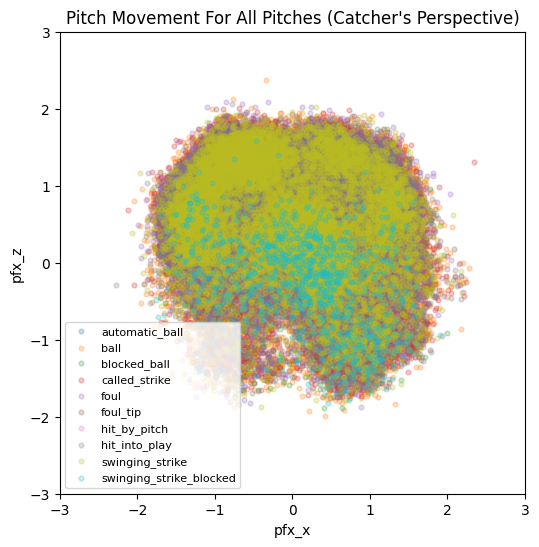

In [94]:
import matplotlib.pyplot as plt


top_desc = sc_df_norm["description"].value_counts().head(10).index
plot_df = sc_df_norm[sc_df_norm["description"].isin(top_desc)]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["pfx_x"], group["pfx_z"], alpha=0.25, s=12, label=desc)



plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("pfx_x")
plt.ylabel("pfx_z")
plt.title("Pitch Movement For All Pitches (Catcher's Perspective)")
plt.legend(loc="best", fontsize=8)
plt.show()


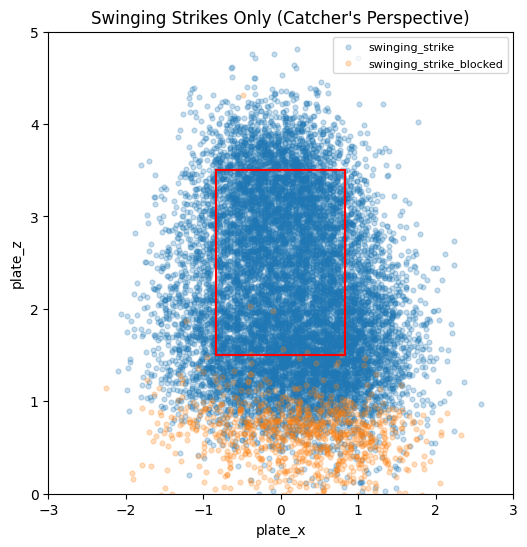

In [95]:
import matplotlib.pyplot as plt

mask = sc_df_norm["description"].isin(["swinging_strike", "swinging_strike_blocked"])
plot_df = sc_df_norm[mask]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["plate_x"], group["plate_z"], alpha=0.25, s=12, label=desc)

# Strike zone
plt.plot([-0.83, 0.83], [1.5, 1.5], color="red")
plt.plot([-0.83, 0.83], [3.5, 3.5], color="red")
plt.plot([-0.83, -0.83], [1.5, 3.5], color="red")
plt.plot([0.83, 0.83], [1.5, 3.5], color="red")

plt.xlim(-3, 3)
plt.ylim(0, 5)
plt.xlabel("plate_x")
plt.ylabel("plate_z")
plt.title("Swinging Strikes Only (Catcher's Perspective)")
plt.legend(loc="upper right", fontsize=8)
plt.show()


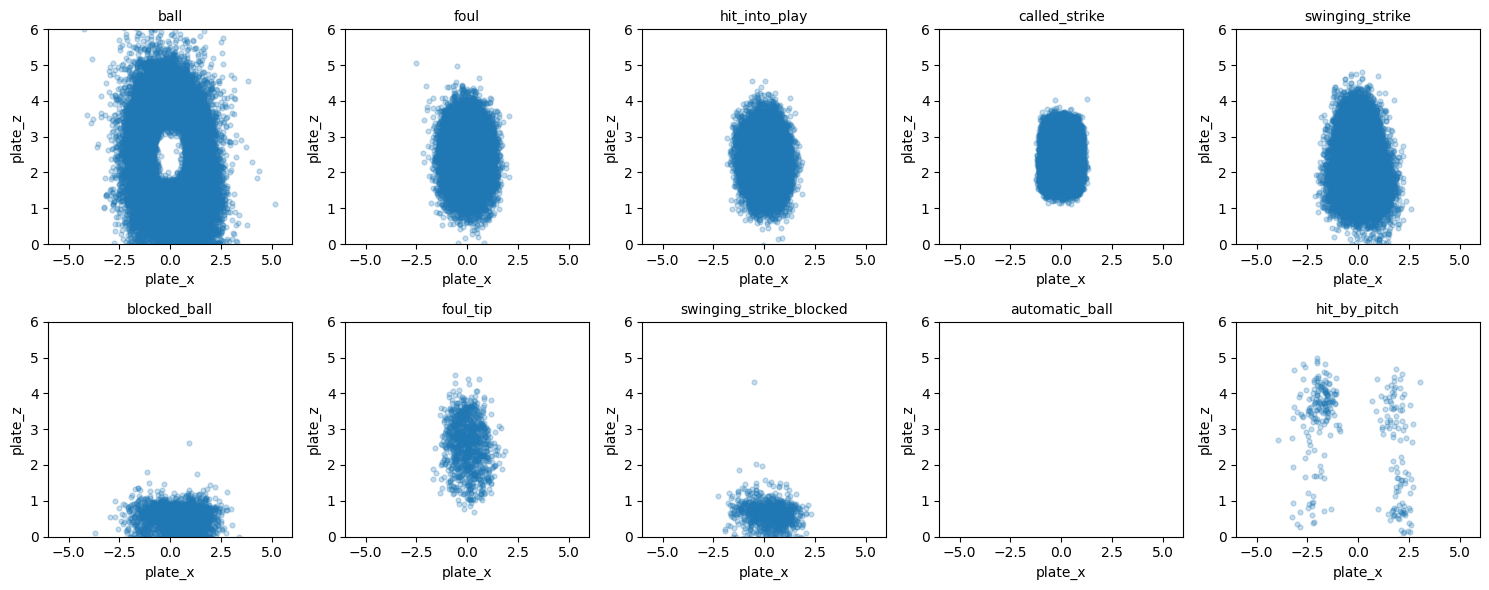

In [96]:
top_desc = sc_df_norm["description"].value_counts().head(10).index
plot_df = sc_df_norm[sc_df_norm["description"].isin(top_desc)]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()  # Flatten to 1D array for easier indexing

for idx, desc in enumerate(top_desc):
    group = plot_df[plot_df["description"] == desc]
    axes[idx].scatter(group["plate_x"], group["plate_z"], alpha=0.25, s=12)
    axes[idx].set_xlim(-6, 6)
    axes[idx].set_ylim(0, 6)
    axes[idx].set_xlabel("plate_x")
    axes[idx].set_ylabel("plate_z")
    axes[idx].set_title(desc, fontsize=10)

plt.tight_layout()
plt.show()

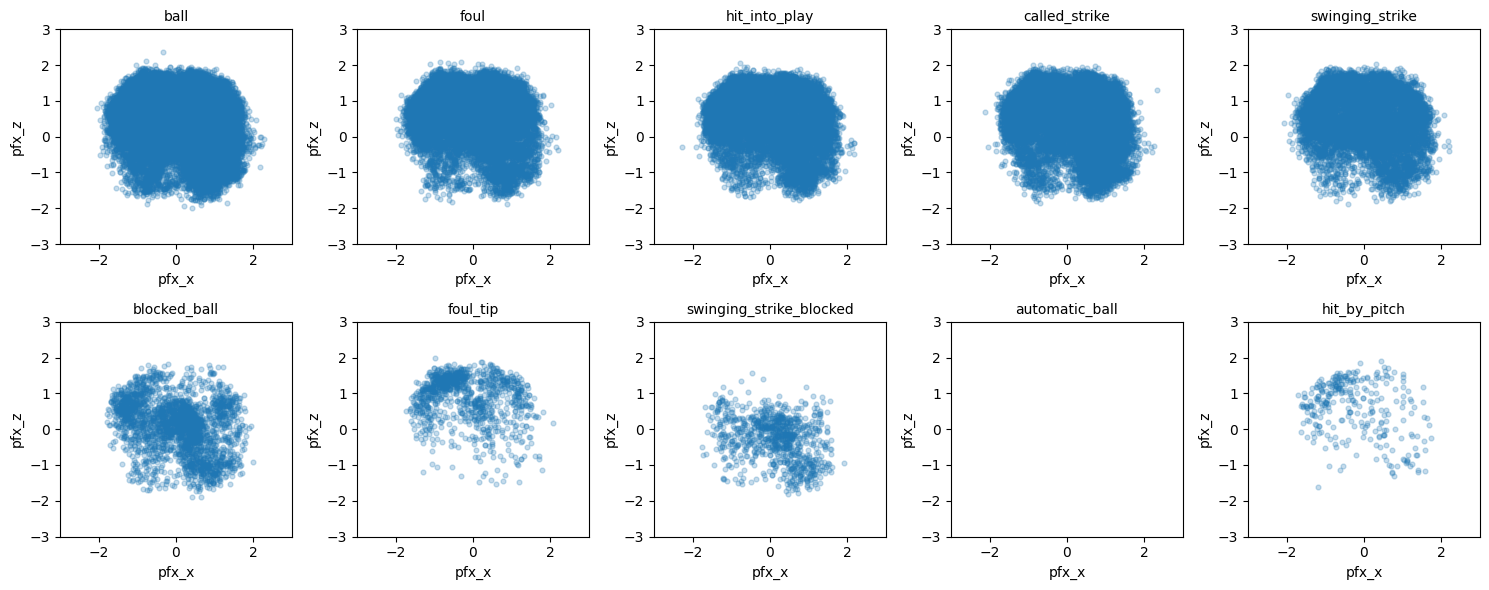

In [97]:
top_desc = sc_df_norm["description"].value_counts().head(10).index
plot_df = sc_df_norm[sc_df_norm["description"].isin(top_desc)]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()  # Flatten to 1D array for easier indexing

for idx, desc in enumerate(top_desc):
    group = plot_df[plot_df["description"] == desc]
    axes[idx].scatter(group["pfx_x"], group["pfx_z"], alpha=0.25, s=12)
    axes[idx].set_xlim(-3, 3)
    axes[idx].set_ylim(-3, 3)
    axes[idx].set_xlabel("pfx_x")
    axes[idx].set_ylabel("pfx_z")
    axes[idx].set_title(desc, fontsize=10)

plt.tight_layout()
plt.show()


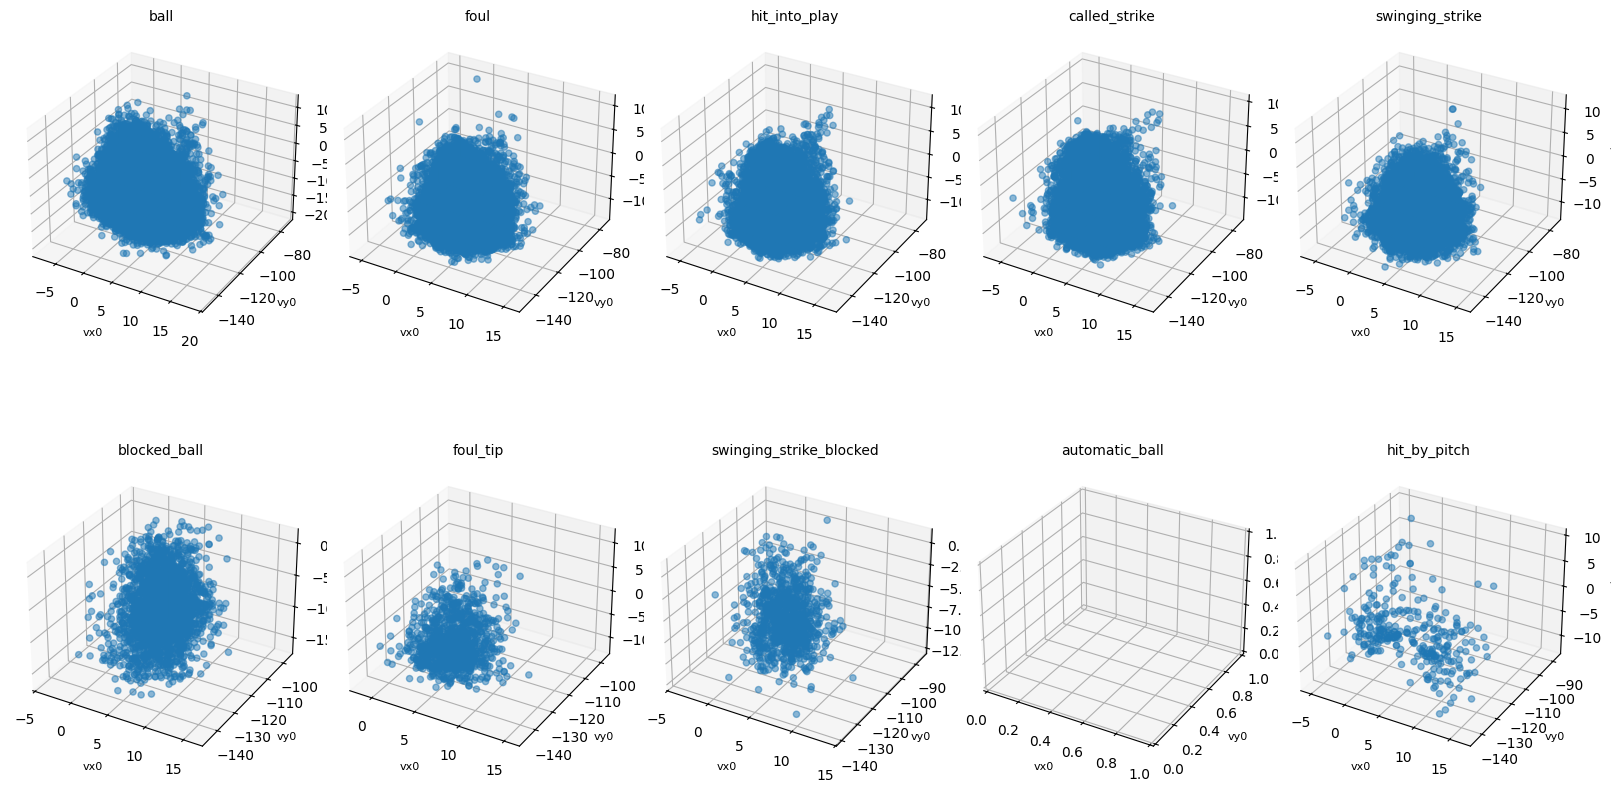

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

top_desc = sc_df_norm["description"].value_counts().head(10).index
plot_df = sc_df_norm[sc_df_norm["description"].isin(top_desc)]

fig = plt.figure(figsize=(16, 10))

for idx, desc in enumerate(top_desc, 1):
    ax = fig.add_subplot(2, 5, idx, projection="3d")
    group = plot_df[plot_df["description"] == desc]
    
    ax.scatter(group["vx0"], group["vy0"], group["vz0"], alpha=0.5, s=20)
    ax.set_xlabel("vx0", fontsize=8)
    ax.set_ylabel("vy0", fontsize=8)
    ax.set_zlabel("vz0", fontsize=8)
    ax.set_title(desc, fontsize=10)

plt.tight_layout()
plt.show()



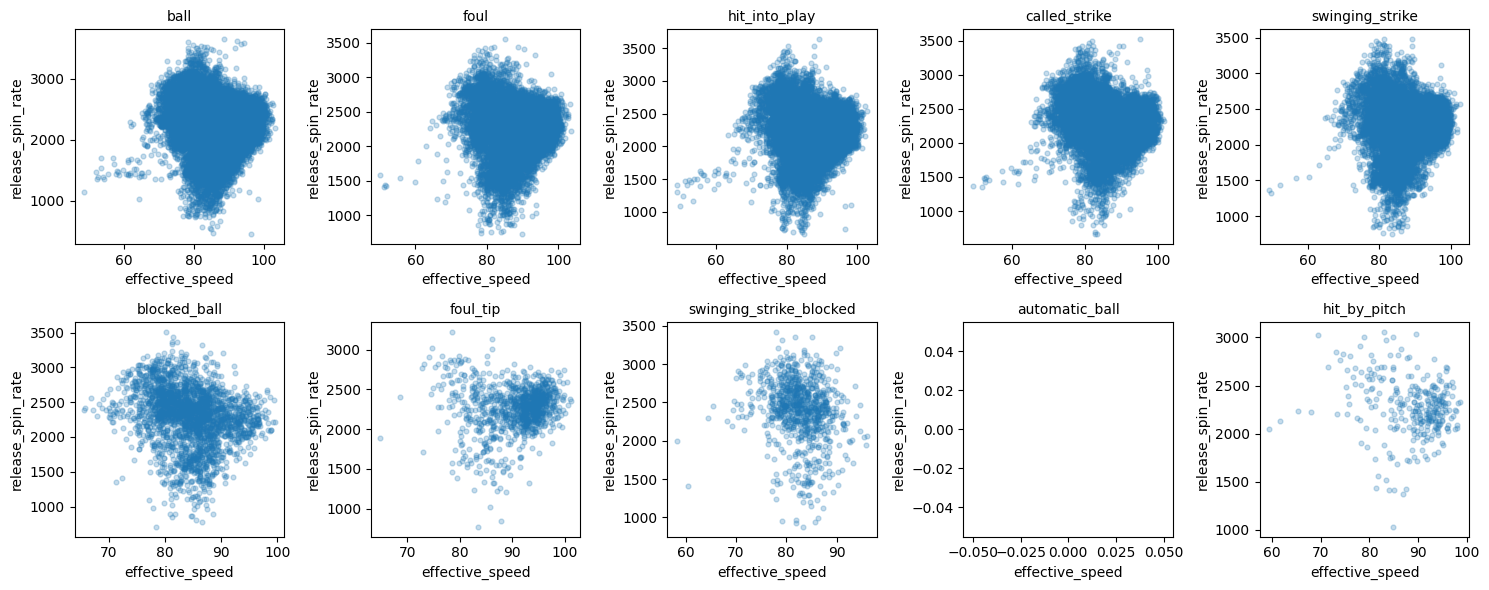

In [99]:
top_desc = sc_df_norm["description"].value_counts().head(10).index
plot_df = sc_df_norm[sc_df_norm["description"].isin(top_desc)]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()  # Flatten to 1D array for easier indexing

for idx, desc in enumerate(top_desc):
    group = plot_df[plot_df["description"] == desc]
    axes[idx].scatter(group["effective_speed"], group["release_spin_rate"], alpha=0.25, s=12)
    axes[idx].set_xlabel("effective_speed")
    axes[idx].set_ylabel("release_spin_rate")
    axes[idx].set_title(desc, fontsize=10)

plt.tight_layout()
plt.show()


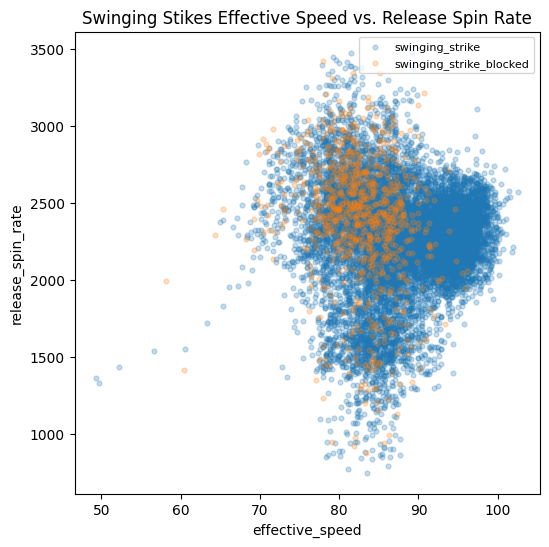

In [100]:
mask = sc_df_norm["description"].isin(["swinging_strike", "swinging_strike_blocked"])
masked_df = sc_df_norm[mask]

plt.figure(figsize=(6, 6))
for desc, group in masked_df.groupby("description"):
    plt.scatter(group["effective_speed"], group["release_spin_rate"], alpha=0.25, s=12, label=desc)

plt.xlabel("effective_speed")
plt.ylabel("release_spin_rate")
plt.title("Swinging Stikes Effective Speed vs. Release Spin Rate")
plt.legend(loc="upper right", fontsize=8)
plt.show()


In [101]:
sc_df_norm.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'batter', 'pitcher', 'description', 'zone',
       'game_type', 'stand', 'p_throws', 'balls', 'strikes', 'game_year',
       'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'vx0', 'vy0', 'vz0', 'ax',
       'ay', 'az', 'sz_top', 'sz_bot', 'effective_speed', 'release_spin_rate',
       'release_extension', 'game_pk', 'fielder_2', 'fielder_3', 'fielder_4',
       'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9',
       'release_pos_y', 'at_bat_number', 'pitch_number', 'pitch_name',
       'home_score', 'away_score', 'bat_score', 'fld_score',
       'if_fielding_alignment', 'of_fielding_alignment', 'spin_axis',
       'home_score_diff', 'bat_score_diff', 'home_win_exp', 'bat_win_exp',
       'age_pit_legacy', 'age_bat_legacy', 'age_pit', 'age_bat',
       'n_thruorder_pitcher', 'n_priorpa_thisgame_player_at_bat',
  

In [102]:
sc_df_norm["description"].value_counts()

description
ball                       37808
foul                       20751
hit_into_play              19729
called_strike              18323
swinging_strike            12033
blocked_ball                2641
foul_tip                    1049
swinging_strike_blocked      927
automatic_ball               399
hit_by_pitch                 299
foul_bunt                    251
missed_bunt                   46
pitchout                      13
bunt_foul_tip                  7
Name: count, dtype: int64

In [103]:
# drop intentional walks
sc_df_norm = sc_df_norm[sc_df_norm["description"].ne("automatic_ball")].copy()

# Combine labels to group balls and stikes
sc_df_norm["description"] = sc_df_norm["description"].replace({
    "swinging_strike": "any_swinging_strike",
    "swinging_strike_blocked": "any_swinging_strike",
    "ball": "any_ball",
    "blocked_ball": "any_ball"
})

print(sc_df_norm["description"].value_counts())
print(sc_df_norm.shape)

description
any_ball               40449
foul                   20751
hit_into_play          19729
called_strike          18323
any_swinging_strike    12960
foul_tip                1049
hit_by_pitch             299
foul_bunt                251
missed_bunt               46
pitchout                  13
bunt_foul_tip              7
Name: count, dtype: int64
(113877, 73)


Basic Model!

In [104]:
# Cell 1 — Target cleanup / consolidation (match your desired target set)

import pandas as pd

df = sc_df_norm.copy()

# Drop automatic_ball rows entirely
df = df[df["description"].ne("automatic_ball")].copy()

# Consolidate labels into your target taxonomy
df["target"] = df["description"].replace({
    "swinging_strike": "any_swinging_strike",
    "swinging_strike_blocked": "any_swinging_strike",
    "ball": "any_ball",
    "blocked_ball": "any_ball",
})

# Keep only the targets you listed (protects against unexpected/extra labels)
TARGETS = [
    "any_ball",
    "foul",
    "hit_into_play",
    "called_strike",
    "any_swinging_strike",
    "foul_tip",
    "hit_by_pitch",
    "foul_bunt",
    "missed_bunt",
    "pitchout",
    "bunt_foul_tip",
]

df = df[df["target"].isin(TARGETS)].copy()

print(df["target"].value_counts().reindex(TARGETS))
print("Shape:", df.shape)


target
any_ball               40449
foul                   20751
hit_into_play          19729
called_strike          18323
any_swinging_strike    12960
foul_tip                1049
hit_by_pitch             299
foul_bunt                251
missed_bunt               46
pitchout                  13
bunt_foul_tip              7
Name: count, dtype: int64
Shape: (113877, 74)


In [130]:
# Cell 2 — Pull data (cached) + build target + time-based split (holdout = Sept 2023)

import pandas as pd
from pybaseball import statcast, cache

cache.enable()  # prevents re-pulling the same requests repeatedly

# Features
FEATURES_NUM = ["effective_speed", "release_spin_rate", "pfx_x", "pfx_z", "plate_x", "plate_z"]
FEATURES_CAT = ["p_throws", "stand"]
FEATURES = FEATURES_NUM + FEATURES_CAT

# Pull statcast data
df_2023 = statcast(start_dt="2023-04-01", end_dt="2023-10-01").copy()

# Ensure game_date is datetime
df_2023["game_date"] = pd.to_datetime(df_2023["game_date"], errors="coerce")
df_2023 = df_2023.dropna(subset=["game_date"]).copy()

# ---- Build target (your taxonomy) ----
df_2023 = df_2023[df_2023["description"].ne("automatic_ball")].copy()

df_2023["target"] = df_2023["description"].replace({
    "swinging_strike": "any_swinging_strike",
    "swinging_strike_blocked": "any_swinging_strike",
    "ball": "any_ball",
    "blocked_ball": "any_ball",
})

TARGETS = [
    "any_ball",
    "foul",
    "hit_into_play",
    "called_strike",
    "any_swinging_strike",
    "foul_tip",
    "hit_by_pitch",
    "foul_bunt",
    "missed_bunt",
    "pitchout",
    "bunt_foul_tip",
]

df_2023 = df_2023[df_2023["target"].isin(TARGETS)].copy()

print("Target counts (all pulled data):")
print(df_2023["target"].value_counts().reindex(TARGETS))
print("Shape:", df_2023.shape)



This is a large query, it may take a moment to complete


100%|██████████| 184/184 [00:09<00:00, 19.34it/s]
C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


Target counts (all pulled data):
target
any_ball               254455
foul                   126853
hit_into_play          123277
called_strike          116994
any_swinging_strike     79854
foul_tip                 7219
hit_by_pitch             2097
foul_bunt                 996
missed_bunt               184
pitchout                   46
bunt_foul_tip              16
Name: count, dtype: int64
Shape: (711991, 119)


In [126]:

# ---- Time split ----
train_end = pd.Timestamp("2023-08-31")
test_start = pd.Timestamp("2023-09-01")
test_end = pd.Timestamp("2023-09-30")

train_df = df_2023[df_2023["game_date"] <= train_end].copy()
test_df  = df_2023[(df_2023["game_date"] >= test_start) & (df_2023["game_date"] <= test_end)].copy()

# Drop rows missing features/target
train_df = train_df.dropna(subset=FEATURES + ["target"]).copy()
test_df  = test_df.dropna(subset=FEATURES + ["target"]).copy()

print("\nTrain date range:", train_df["game_date"].min(), "→", train_df["game_date"].max(), "| rows:", len(train_df))
print("Test  date range:", test_df["game_date"].min(),  "→", test_df["game_date"].max(),  "| rows:", len(test_df))

print("\nTrain target counts:\n", train_df["target"].value_counts().reindex(TARGETS))
print("\nTest target counts:\n", test_df["target"].value_counts().reindex(TARGETS))


Train date range: 2023-04-01 00:00:00 → 2023-08-31 00:00:00 | rows: 581197
Test  date range: 2023-09-01 00:00:00 → 2023-09-30 00:00:00 | rows: 121832

Train target counts:
 target
any_ball               207587
foul                   103115
hit_into_play          100913
called_strike           95861
any_swinging_strike     65109
foul_tip                 5863
hit_by_pitch             1708
foul_bunt                 830
missed_bunt               160
pitchout                   36
bunt_foul_tip              15
Name: count, dtype: int64

Test target counts:
 target
any_ball               43709
foul                   22072
hit_into_play          20849
called_strike          19707
any_swinging_strike    13698
foul_tip                1260
hit_by_pitch             353
foul_bunt                152
missed_bunt               21
pitchout                  10
bunt_foul_tip              1
Name: count, dtype: int64


In [118]:
train_df.shape

(581197, 119)

In [106]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

X_train = train_df[FEATURES]
y_train = train_df["target"]

X_test = test_df[FEATURES]
y_test = test_df["target"]

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), FEATURES_NUM),
        ('cat', OneHotEncoder(handle_unknown='ignore'), FEATURES_CAT)
    ],
    remainder='drop',
)

clf = LogisticRegression(
    multi_class='multinomial',
    penalty='l2',
    C=1.0,
    solver="lbfgs",
    max_iter=200,
    n_jobs=-1
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", clf)
])

model.fit(X_train, y_train)

print("Classes:", model.named_steps["classifier"].classes_)

C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classes: ['any_ball' 'any_swinging_strike' 'bunt_foul_tip' 'called_strike' 'foul'
 'foul_bunt' 'foul_tip' 'hit_by_pitch' 'hit_into_play' 'missed_bunt'
 'pitchout']


In [119]:
X_train.shape 

(581197, 7)

In [107]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss, accuracy_score, roc_auc_score 

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
ll = log_loss(y_test, y_proba, labels=model.named_steps["classifier"].classes_)
auc_ovr = roc_auc_score(y_test, y_proba, multi_class='ovr')
auc_ovo = roc_auc_score(y_test, y_proba, multi_class='ovo')

print("Accuracy:", acc)
print("LogLoss:", ll)
print("ROC AUC (ovr):", auc_ovr)
print("ROC AUC (ovo):", auc_ovo)

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=3))

print("\nConfusion matrix (rows=true, cols=pred):")
cm = confusion_matrix(y_test, y_pred, labels=model.named_steps["classifier"].classes_)
print(pd.DataFrame(cm, index=model.named_steps["classifier"].classes_, columns=model.named_steps["classifier"].classes_))

Accuracy: 0.342159695318143
LogLoss: 1.5798046237819219
ROC AUC (ovr): 0.6519924148977836
ROC AUC (ovo): 0.6213293538268485

Classification report:


C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


                     precision    recall  f1-score   support

           any_ball      0.348     0.953     0.510     43709
any_swinging_strike      0.000     0.000     0.000     13698
      bunt_foul_tip      0.000     0.000     0.000         1
      called_strike      0.000     0.000     0.000     19707
               foul      0.014     0.001     0.002     22072
          foul_bunt      0.000     0.000     0.000       152
           foul_tip      0.000     0.000     0.000      1260
       hit_by_pitch      0.000     0.000     0.000       353
      hit_into_play      0.000     0.000     0.000     20849
        missed_bunt      0.000     0.000     0.000        21
           pitchout      0.000     0.000     0.000        10

           accuracy                          0.342    121832
          macro avg      0.033     0.087     0.047    121832
       weighted avg      0.128     0.342     0.183    121832


Confusion matrix (rows=true, cols=pred):
                     any_ball  any_swing

C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# Model, redux

In [108]:
# Cell 6 — Diagnostics: majority-class baseline + predicted class distribution

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# 1) Majority-class baseline on the test set
majority_class = y_test.value_counts().idxmax()
y_pred_majority = np.full(shape=len(y_test), fill_value=majority_class, dtype=object)

acc_majority = accuracy_score(y_test, y_pred_majority)
print("Majority class:", majority_class)
print("Majority-class baseline accuracy:", acc_majority)

# 2) Predicted class distribution from your current model
y_pred = model.predict(X_test)
pred_dist = pd.Series(y_pred).value_counts(normalize=True).rename("predicted_share")
true_dist = y_test.value_counts(normalize=True).rename("true_share")

dist = pd.concat([true_dist, pred_dist], axis=1).fillna(0.0).sort_values("true_share", ascending=False)
print("\nTrue vs Predicted class shares:")
print(dist)


Majority class: any_ball
Majority-class baseline accuracy: 0.35876452820277105

True vs Predicted class shares:
                     true_share  predicted_share
any_ball               0.358765         0.981951
foul                   0.181168         0.017179
hit_into_play          0.171129         0.000854
called_strike          0.161756         0.000008
any_swinging_strike    0.112434         0.000000
foul_tip               0.010342         0.000000
hit_by_pitch           0.002897         0.000008
foul_bunt              0.001248         0.000000
missed_bunt            0.000172         0.000000
pitchout               0.000082         0.000000
bunt_foul_tip          0.000008         0.000000


In [109]:
# Cell 7 — Refit with class_weight="balanced" (minimal change)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), FEATURES_NUM),
        ("cat", OneHotEncoder(handle_unknown="ignore"), FEATURES_CAT),
    ],
    remainder="drop",
)

clf_balanced = LogisticRegression(
    multi_class="multinomial",
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=300,
    class_weight="balanced"
)

model_balanced = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", clf_balanced)
])

model_balanced.fit(X_train, y_train)

print("Classes:", model_balanced.named_steps["clf"].classes_)


C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classes: ['any_ball' 'any_swinging_strike' 'bunt_foul_tip' 'called_strike' 'foul'
 'foul_bunt' 'foul_tip' 'hit_by_pitch' 'hit_into_play' 'missed_bunt'
 'pitchout']


In [110]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss, accuracy_score, roc_auc_score 

y_pred = model_balanced.predict(X_test)
y_proba = model_balanced.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
ll = log_loss(y_test, y_proba, labels=model_balanced.named_steps["clf"].classes_)
auc_ovr = roc_auc_score(y_test, y_proba, multi_class='ovr')
auc_ovo = roc_auc_score(y_test, y_proba, multi_class='ovo')

print("Accuracy:", acc)
print("LogLoss:", ll)
print("ROC AUC (ovr):", auc_ovr)
print("ROC AUC (ovo):", auc_ovo)

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=3))

# print("\nConfusion matrix (rows=true, cols=pred):")
#cm = confusion_matrix(y_test, y_pred, labels=model.named_steps["clf_balanced"].classes_)
# print(pd.DataFrame(cm, index=model.named_steps["clf_balanced"].classes_, columns=model.named_steps["clf_balanced"].classes_))

Accuracy: 0.0936781797885613
LogLoss: 2.3369171785718095
ROC AUC (ovr): 0.6734905483579942
ROC AUC (ovo): 0.714368207460125

Classification report:
                     precision    recall  f1-score   support

           any_ball      0.488     0.135     0.211     43709
any_swinging_strike      0.176     0.263     0.211     13698
      bunt_foul_tip      0.000     1.000     0.000         1
      called_strike      0.195     0.008     0.016     19707
               foul      0.254     0.001     0.002     22072
          foul_bunt      0.001     0.026     0.002       152
           foul_tip      0.017     0.272     0.032      1260
       hit_by_pitch      0.008     0.317     0.016       353
      hit_into_play      0.321     0.061     0.102     20849
        missed_bunt      0.000     0.238     0.001        21
           pitchout      0.001     0.800     0.002        10

           accuracy                          0.094    121832
          macro avg      0.133     0.284     0.054    121

In [111]:
# Post Balence -  Diagnostics: majority-class baseline + predicted class distribution

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# 1) Majority-class baseline on the test set
majority_class = y_test.value_counts().idxmax()
y_pred_majority = np.full(shape=len(y_test), fill_value=majority_class, dtype=object)

acc_majority = accuracy_score(y_test, y_pred_majority)
print("Majority class:", majority_class)
print("Majority-class baseline accuracy:", acc_majority)

# 2) Predicted class distribution from your current model
y_pred = model_balanced.predict(X_test)
pred_dist = pd.Series(y_pred).value_counts(normalize=True).rename("predicted_share")
true_dist = y_test.value_counts(normalize=True).rename("true_share")

dist = pd.concat([true_dist, pred_dist], axis=1).fillna(0.0).sort_values("true_share", ascending=False)
print("\nTrue vs Predicted class shares:")
print(dist)


Majority class: any_ball
Majority-class baseline accuracy: 0.35876452820277105

True vs Predicted class shares:
                     true_share  predicted_share
any_ball               0.358765         0.099137
foul                   0.181168         0.000550
hit_into_play          0.171129         0.032356
called_strike          0.161756         0.006763
any_swinging_strike    0.112434         0.167871
foul_tip               0.010342         0.167009
hit_by_pitch           0.002897         0.111481
foul_bunt              0.001248         0.033858
missed_bunt            0.000172         0.096863
pitchout               0.000082         0.084608
bunt_foul_tip          0.000008         0.199504


In [112]:
# Cell 9 — Optional: simplify target by dropping ultra-rare classes and re-run baseline quickly
# (Keeps the "core" outcomes; avoids classes with near-zero support)

CORE_TARGETS = [
    "any_ball",
    "called_strike",
    "any_swinging_strike",
    "foul",
    "hit_into_play",
    "foul_tip",
    "hit_by_pitch",
]

train_core = train_df[train_df["target"].isin(CORE_TARGETS)].copy()
test_core  = test_df[test_df["target"].isin(CORE_TARGETS)].copy()

X_train_c = train_core[FEATURES]
y_train_c = train_core["target"]
X_test_c  = test_core[FEATURES]
y_test_c  = test_core["target"]

model_core = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", LogisticRegression(
        multi_class="multinomial",
        penalty="l2",
        C=1.0,
        solver="lbfgs",
        max_iter=300,
        class_weight="balanced"
    ))
])

model_core.fit(X_train_c, y_train_c)

y_pred_c = model_core.predict(X_test_c)
y_proba_c = model_core.predict_proba(X_test_c)

auc_ovr = roc_auc_score(y_test_c, y_proba_c, multi_class='ovr')
auc_ovo = roc_auc_score(y_test_c, y_proba_c, multi_class='ovo')

print("Core Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Core LogLoss:", log_loss(y_test_c, y_proba_c, labels=model_core.named_steps["clf"].classes_))
print("auc_ovo:", auc_ovo)
print("auc_ovr:", auc_ovr)
print("\nCore classification report:")
print(classification_report(y_test_c, y_pred_c, digits=3, zero_division=0))


C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Core Accuracy: 0.1444495593844535
Core LogLoss: 1.9149698202284147
auc_ovo: 0.6045181259889508
auc_ovr: 0.5938401913693454

Core classification report:
                     precision    recall  f1-score   support

           any_ball      0.484     0.190     0.273     43709
any_swinging_strike      0.177     0.366     0.239     13698
      called_strike      0.232     0.027     0.049     19707
               foul      0.217     0.010     0.019     22072
           foul_tip      0.016     0.479     0.031      1260
       hit_by_pitch      0.008     0.564     0.015       353
      hit_into_play      0.301     0.128     0.180     20849

           accuracy                          0.144    121648
          macro avg      0.205     0.252     0.115    121648
       weighted avg      0.323     0.144     0.168    121648



In [116]:
train_df.shape
test_core.shape

(121648, 119)

In [127]:
df_model = df_2023.copy()

# drop strategy based labels
DROP_LABELS = {"foul_bunt", "missed_bunt", "pitchout", "bunt_foul_tip"}
df_model = df_model[~df_model["target"].isin(DROP_LABELS)].copy()

# Merge foul and foul_tip
df_model["target"] = df_model["target"].replace({
    "foul_tip": "foul"
})



Filtered down and condensed target set

In [128]:
# Set final targets
TARGETS_V2 = [
    "any_ball",
    "called_strike",
    "any_swinging_strike",
    "foul",
    "hit_into_play",
    "hit_by_pitch"
    ]

df_model = df_model[df_model["target"].isin(TARGETS_V2)].copy()

print(df_model["target"].value_counts())
print(df_model.shape)

target
any_ball               254455
foul                   134072
hit_into_play          123277
called_strike          116994
any_swinging_strike     79854
hit_by_pitch             2097
Name: count, dtype: int64
(710749, 119)


In [132]:
# Cell B — Time split (train <= 2023-08-31, test = Sept 2023) + drop missing features

import pandas as pd

FEATURES_NUM = ["effective_speed", "release_spin_rate", "pfx_x", "pfx_z", "plate_x", "plate_z"]
FEATURES_CAT = ["p_throws", "stand"]
FEATURES = FEATURES_NUM + FEATURES_CAT

# Ensure datetime
df_model["game_date"] = pd.to_datetime(df_model["game_date"], errors="coerce")
df_model = df_model.dropna(subset=["game_date"]).copy()

train_end = pd.Timestamp("2023-08-31")
test_start = pd.Timestamp("2023-09-01")
test_end = pd.Timestamp("2023-09-30")

train_df_v2 = df_model[df_model["game_date"] <= train_end].copy()
test_df_v2  = df_model[(df_model["game_date"] >= test_start) & (df_model["game_date"] <= test_end)].copy()

train_df_v2 = train_df_v2.dropna(subset=FEATURES + ["target"]).copy()
test_df_v2  = test_df_v2.dropna(subset=FEATURES + ["target"]).copy()

X_train_v2 = train_df_v2[FEATURES]
y_train_v2 = train_df_v2["target"]
X_test_v2  = test_df_v2[FEATURES]
y_test_v2  = test_df_v2["target"]

print("Train rows:", len(train_df_v2), "| Test rows:", len(test_df_v2))
print("\nTrain target counts:\n", y_train_v2.value_counts().reindex(TARGETS_V2))
print("\nTest target counts:\n", y_test_v2.value_counts().reindex(TARGETS_V2))
print("Train Shape:\n" , X_train_v2.shape)
print("Test Shape:\n" , X_test_v2.shape)


Train rows: 580156 | Test rows: 121648

Train target counts:
 target
any_ball               207587
called_strike           95861
any_swinging_strike     65109
foul                   108978
hit_into_play          100913
hit_by_pitch             1708
Name: count, dtype: int64

Test target counts:
 target
any_ball               43709
called_strike          19707
any_swinging_strike    13698
foul                   23332
hit_into_play          20849
hit_by_pitch             353
Name: count, dtype: int64
Train Shape:
 (580156, 8)
Test Shape:
 (121648, 8)


In [133]:
# Cell C — Fit multinomial logistic regression (L2, scaled numerics, one-hot p_throws)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

preprocess_v2 = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), FEATURES_NUM),
        ("cat", OneHotEncoder(handle_unknown="ignore"), FEATURES_CAT),
    ],
    remainder="drop",
)

clf_v2 = LogisticRegression(
    multi_class="multinomial",
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=300
)

model_v2 = Pipeline(steps=[
    ("preprocess", preprocess_v2),
    ("clf", clf_v2),
])

model_v2.fit(X_train_v2, y_train_v2)
print("Classes:", model_v2.named_steps["clf"].classes_)


C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classes: ['any_ball' 'any_swinging_strike' 'called_strike' 'foul' 'hit_by_pitch'
 'hit_into_play']


In [134]:
# Cell D — Scoring (Accuracy, LogLoss, AUC ovr/ovo, report, confusion matrix)

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

y_pred_v2 = model_v2.predict(X_test_v2)
y_proba_v2 = model_v2.predict_proba(X_test_v2)

classes_v2 = model_v2.named_steps["clf"].classes_

acc_v2 = accuracy_score(y_test_v2, y_pred_v2)
ll_v2 = log_loss(y_test_v2, y_proba_v2, labels=classes_v2)

# AUC (needs binarized y)
y_test_bin = label_binarize(y_test_v2, classes=classes_v2)
auc_ovr_v2 = roc_auc_score(y_test_bin, y_proba_v2, average="macro", multi_class="ovr")
auc_ovo_v2 = roc_auc_score(y_test_bin, y_proba_v2, average="macro", multi_class="ovo")

print("Accuracy:", acc_v2)
print("LogLoss:", ll_v2)
print("ROC AUC (ovr):", auc_ovr_v2)
print("ROC AUC (ovo):", auc_ovo_v2)

print("\nClassification report:")
print(classification_report(y_test_v2, y_pred_v2, digits=3, zero_division=0))

print("\nConfusion matrix (rows=true, cols=pred):")
cm_v2 = confusion_matrix(y_test_v2, y_pred_v2, labels=classes_v2)
print(pd.DataFrame(cm_v2, index=classes_v2, columns=classes_v2))


Accuracy: 0.3350651058792582
LogLoss: 1.529570831954463
ROC AUC (ovr): 0.5769543507869722
ROC AUC (ovo): 0.5769543507869722

Classification report:
                     precision    recall  f1-score   support

           any_ball      0.344     0.929     0.502     43709
any_swinging_strike      0.000     0.000     0.000     13698
      called_strike      0.000     0.000     0.000     19707
               foul      0.043     0.006     0.011     23332
       hit_by_pitch      0.000     0.000     0.000       353
      hit_into_play      0.000     0.000     0.000     20849

           accuracy                          0.335    121648
          macro avg      0.064     0.156     0.086    121648
       weighted avg      0.132     0.335     0.183    121648


Confusion matrix (rows=true, cols=pred):
                     any_ball  any_swinging_strike  called_strike  foul  \
any_ball                40611                    0              0  3013   
any_swinging_strike     13485                  

In [135]:
# Cell E — Compare true vs predicted class shares + majority baseline accuracy

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# True vs predicted shares
true_share = y_test_v2.value_counts(normalize=True).rename("true_share")
pred_share = pd.Series(y_pred_v2).value_counts(normalize=True).rename("pred_share")

share_cmp = (
    pd.concat([true_share, pred_share], axis=1)
    .fillna(0.0)
    .reindex(TARGETS_V2)
)

print("True vs Predicted shares (test set):")
print(share_cmp)

# Majority baseline accuracy
majority_class = y_test_v2.value_counts().idxmax()
y_pred_majority = np.full(len(y_test_v2), majority_class, dtype=object)
acc_majority = accuracy_score(y_test_v2, y_pred_majority)

print("\nMajority class:", majority_class)
print("Majority baseline accuracy:", acc_majority)


True vs Predicted shares (test set):
                     true_share  pred_share
any_ball               0.359307    0.970423
called_strike          0.162000    0.000000
any_swinging_strike    0.112604    0.000000
foul                   0.191799    0.028755
hit_into_play          0.171388    0.000814
hit_by_pitch           0.002902    0.000008

Majority class: any_ball
Majority baseline accuracy: 0.3593071813757727


Switch to xgboost model and include a "in_zone" feature

In [142]:
bzone_nulls = df_model["sz_bot"].isna().sum()
tzone_nulls = df_model["sz_top"].isna().sum()
print(f"sz_bot nulls: {bzone_nulls}, sz_top nulls: {tzone_nulls}")

sz_bot nulls: 271, sz_top nulls: 271


In [145]:
# Cell 1 — Add plate_x_batter + in_zone, and DROP rows with null sz_bot/sz_top

df_xgb = df_model.copy()

# Drop rows where strike-zone bounds are missing (needed for in_zone)
df_xgb = df_xgb.dropna(subset=["sz_bot", "sz_top"]).copy()

# Batter-standardized horizontal axis (inside-to-batter is positive)
stand_sign = df_xgb["stand"].map({"R": -1, "L": 1})
df_xgb["plate_x_batter"] = df_xgb["plate_x"] * stand_sign

# Strike zone feature
ZONE_HALF_WIDTH_FT = 0.83
df_xgb["in_zone"] = (
    df_xgb["plate_x"].abs().le(ZONE_HALF_WIDTH_FT) &
    df_xgb["plate_z"].ge(df_xgb["sz_bot"]) &
    df_xgb["plate_z"].le(df_xgb["sz_top"])
).astype("int8")

print("Dropped rows due to null sz_bot/sz_top. New shape:", df_xgb.shape)
print(df_xgb[["plate_x", "plate_z", "stand", "plate_x_batter", "in_zone", "sz_bot", "sz_top"]].head())
print("\nIn-zone rate:", df_xgb["in_zone"].mean())


Dropped rows due to null sz_bot/sz_top. New shape: (710478, 121)
      plate_x  plate_z stand  plate_x_batter  in_zone  sz_bot  sz_top
2395     0.33     2.01     L            0.33        1    1.74    3.81
2527     0.09     2.71     L            0.09        1    1.74    3.81
2626    -0.24     0.53     L           -0.24        0    1.78    3.71
2727     0.81     0.49     L            0.81        0    1.74    3.78
2743    -0.78     2.05     L           -0.78        1    1.74    3.81

In-zone rate: 0.45269241271369415


In [147]:
# Cell 2 — Time split (train <= 2023-08-31, test = Sept 2023) + feature sets for BOTH runs

import pandas as pd

df_xgb["game_date"] = pd.to_datetime(df_xgb["game_date"], errors="coerce")
df_xgb = df_xgb.dropna(subset=["game_date"]).copy()

train_end = pd.Timestamp("2023-08-31")
test_start = pd.Timestamp("2023-09-01")
test_end = pd.Timestamp("2023-09-30")

train_df = df_xgb[df_xgb["game_date"] <= train_end].copy()
test_df  = df_xgb[(df_xgb["game_date"] >= test_start) & (df_xgb["game_date"] <= test_end)].copy()

# Baseline XGB features (NO in_zone)
FEATURES_NUM_BASE = ["effective_speed", "release_spin_rate", "pfx_x", "pfx_z", "plate_x_batter", "plate_z"]
FEATURES_CAT = ["p_throws", "stand"]  # include stand to make plate_x_batter meaningful
FEATURES_BASE = FEATURES_NUM_BASE + FEATURES_CAT

# With in_zone
FEATURES_NUM_ZONE = FEATURES_NUM_BASE + ["in_zone"]
FEATURES_ZONE = FEATURES_NUM_ZONE + FEATURES_CAT

# Drop missing
train_df = train_df.dropna(subset=FEATURES_ZONE + ["target"]).copy()
test_df  = test_df.dropna(subset=FEATURES_ZONE + ["target"]).copy()

print("Train rows:", len(train_df), "Test rows:", len(test_df))
print("\nTrain target counts:\n", train_df["target"].value_counts())
print("\nTest  target counts:\n", test_df["target"].value_counts())
print("Train Shape:\n" , train_df[FEATURES_ZONE].shape)
print("Test Shape:\n" , test_df[FEATURES_ZONE].shape)

Train rows: 580156 Test rows: 121648

Train target counts:
 target
any_ball               207587
foul                   108978
hit_into_play          100913
called_strike           95861
any_swinging_strike     65109
hit_by_pitch             1708
Name: count, dtype: int64

Test  target counts:
 target
any_ball               43709
foul                   23332
hit_into_play          20849
called_strike          19707
any_swinging_strike    13698
hit_by_pitch             353
Name: count, dtype: int64
Train Shape:
 (580156, 9)
Test Shape:
 (121648, 9)


In [149]:
# Cell 3 (fixed) — XGBoost baseline model (NO in_zone) with label encoding

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# X / y
X_train_base = train_df[FEATURES_BASE]
X_test_base  = test_df[FEATURES_BASE]

le = LabelEncoder()
y_train_enc = le.fit_transform(train_df["target"])
y_test_enc  = le.transform(test_df["target"])

preprocess_base = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), FEATURES_CAT),
    ],
    remainder="passthrough"
)

xgb_base = XGBClassifier(
    objective="multi:softprob",
    num_class=len(le.classes_),
    eval_metric="mlogloss",
    n_estimators=300,
    learning_rate=0.08,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    tree_method="hist",
    n_jobs=-1,
    random_state=42
)

model_xgb_base = Pipeline(steps=[
    ("preprocess", preprocess_base),
    ("xgb", xgb_base)
])

model_xgb_base.fit(X_train_base, y_train_enc)

print("Label classes:", list(le.classes_))


Label classes: ['any_ball', 'any_swinging_strike', 'called_strike', 'foul', 'hit_by_pitch', 'hit_into_play']


In [150]:
# Cell 4 (fixed) — Evaluate baseline XGB (decode predictions back to strings)

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

y_pred_enc = model_xgb_base.predict(X_test_base)
y_proba = model_xgb_base.predict_proba(X_test_base)

y_pred = le.inverse_transform(y_pred_enc)
y_test = test_df["target"].values  # string labels

acc = accuracy_score(y_test, y_pred)
ll = log_loss(y_test_enc, y_proba, labels=np.arange(len(le.classes_)))  # logloss on encoded labels

# AUC (binarize encoded y)
y_test_bin = label_binarize(y_test_enc, classes=np.arange(len(le.classes_)))
auc_ovr = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")
auc_ovo = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovo")

print("=== XGB (no in_zone) ===")
print("Accuracy:", acc)
print("LogLoss:", ll)
print("ROC AUC (ovr):", auc_ovr)
print("ROC AUC (ovo):", auc_ovo)

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=3, zero_division=0))

print("\nConfusion matrix (rows=true, cols=pred):")
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
print(pd.DataFrame(cm, index=le.classes_, columns=le.classes_))

true_share = pd.Series(y_test).value_counts(normalize=True).rename("true_share")
pred_share = pd.Series(y_pred).value_counts(normalize=True).rename("pred_share")
share_cmp = pd.concat([true_share, pred_share], axis=1).fillna(0.0).sort_values("true_share", ascending=False)

print("\nTrue vs Predicted shares:")
print(share_cmp)


=== XGB (no in_zone) ===
Accuracy: 0.5462317506247534
LogLoss: 1.0628610703387822
ROC AUC (ovr): 0.8385466191476034
ROC AUC (ovo): 0.8385466191476034

Classification report:
                     precision    recall  f1-score   support

           any_ball      0.720     0.922     0.809     43709
any_swinging_strike      0.327     0.051     0.088     13698
      called_strike      0.442     0.475     0.458     19707
               foul      0.382     0.319     0.348     23332
       hit_by_pitch      0.561     0.235     0.331       353
      hit_into_play      0.377     0.410     0.393     20849

           accuracy                          0.546    121648
          macro avg      0.468     0.402     0.404    121648
       weighted avg      0.507     0.546     0.510    121648


Confusion matrix (rows=true, cols=pred):
                     any_ball  any_swinging_strike  called_strike  foul  \
any_ball                40308                  484           1364  1075   
any_swinging_strike  

In [163]:
# EDA Cell — Swinging-strike vs ball rate by zone_out_dist bucket x count

import numpy as np
import pandas as pd

eda = df_xgb.copy()  # df_xgb has plate_x, plate_z, sz_top, sz_bot, target, balls, strikes, stand, etc.

# Keep just the two labels of interest
eda = eda[eda["target"].isin(["any_ball", "any_swinging_strike"])].copy()

# Drop missing zone bounds (already done in df_xgb, but safe)
eda = eda.dropna(subset=["sz_bot", "sz_top", "plate_x", "plate_z", "balls", "strikes"]).copy()

# Continuous distance outside the zone (0 if in-zone)
ZONE_HALF_WIDTH_FT = 0.83
x_out = (eda["plate_x"].abs() - ZONE_HALF_WIDTH_FT).clip(lower=0)
z_out_low = (eda["sz_bot"] - eda["plate_z"]).clip(lower=0)
z_out_high = (eda["plate_z"] - eda["sz_top"]).clip(lower=0)
eda["zone_out_dist"] = np.sqrt(x_out**2 + np.maximum(z_out_low, z_out_high)**2)

# Bin distance (tweak bins if you want finer)
bins = [-1e-9, 0, 0.05, 0.10, 0.20, 0.35, 0.60, 1.00, 10.0]
labels = ["in_zone", "0-0.05", "0.05-0.10", "0.10-0.20", "0.20-0.35", "0.35-0.60", "0.60-1.0", "1.0+"]

eda["dist_bin"] = pd.cut(eda["zone_out_dist"], bins=bins, labels=labels)

# Indicator for swinging strike
eda["is_swstr"] = (eda["target"] == "any_swinging_strike").astype(int)

# Group and compute rates
g = (
    eda.groupby(["balls", "strikes", "dist_bin"], observed=True)
       .agg(n=("is_swstr", "size"), swstr_rate=("is_swstr", "mean"))
       .reset_index()
)

# Optional: filter out tiny groups to reduce noise
MIN_N = 200
g_filt = g[g["n"] >= MIN_N].copy()

# Create a pivot table: rows = (balls,strikes), columns = dist_bin
pivot_rate = g_filt.pivot_table(index=["balls", "strikes"], columns="dist_bin", values="swstr_rate")
pivot_n    = g_filt.pivot_table(index=["balls", "strikes"], columns="dist_bin", values="n")

# Display nicely
print("Swinging-strike rate (among {any_ball, any_swinging_strike}) by count x distance-from-zone bin")
display(pivot_rate)

print(f"\nSample size n per cell (only showing groups with n >= {MIN_N})")
display(pivot_n)


Swinging-strike rate (among {any_ball, any_swinging_strike}) by count x distance-from-zone bin


C:\Users\elieberm1\AppData\Local\Temp\ipykernel_41252\1628850024.py:42: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_rate = g_filt.pivot_table(index=["balls", "strikes"], columns="dist_bin", values="swstr_rate")
C:\Users\elieberm1\AppData\Local\Temp\ipykernel_41252\1628850024.py:43: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_n    = g_filt.pivot_table(index=["balls", "strikes"], columns="dist_bin", values="n")


dist_bin        in_zone    0-0.05  0.05-0.10  0.10-0.20  0.20-0.35  0.35-0.60  \
balls strikes                                                                   
0     0        0.706790  0.289644   0.218307   0.144168   0.121022   0.096961   
      1        0.786041  0.451389   0.357447   0.275574   0.223925   0.183606   
      2        0.813411  0.530556   0.413043   0.349342   0.292840   0.259259   
1     0        0.814471  0.383582   0.277722   0.222063   0.164721   0.133565   
      1        0.840832  0.466568   0.398020   0.293171   0.237701   0.205665   
      2        0.856882  0.546332   0.450488   0.372510   0.314815   0.280521   
2     0        0.825279  0.376744   0.326409   0.167045   0.158069   0.101602   
      1        0.857252  0.516129   0.407266   0.289928   0.219974   0.193257   
      2        0.871424  0.591880   0.503864   0.412941   0.310555   0.265931   
3     0             NaN       NaN        NaN   0.027211   0.020243   0.007257   
      1        0.841451       NaN        NaN   0.191638   0.153846   0.112741   
      2        0.908887  0.597938   0.473973   0.362849   0.287589   0.237378   

dist_bin       0.60-1.0      1.0+  
balls strikes                      
0     0        0.066588  0.035684  
      1        0.127504  0.059410  
      2        0.183475  0.075698  
1     0        0.093140  0.046717  
      1        0.144583  0.065458  
      2        0.193948  0.089759  
2     0        0.070304  0.035461  
      1        0.127812  0.057558  
      2        0.193773  0.096413  
3     0        0.009452  0.004219  
      1        0.073778  0.031469  
      2        0.178097  0.091728


Sample size n per cell (only showing groups with n >= 200)


dist_bin       in_zone  0-0.05  0.05-0.10  0.10-0.20  0.20-0.35  0.35-0.60  \
balls strikes                                                                
0     0         9587.0  1854.0     2753.0     8067.0    13196.0    18657.0   
      1         5688.0  1008.0     1410.0     3705.0     6328.0     9918.0   
      2         2058.0   360.0      506.0     1291.0     2486.0     4752.0   
1     0         4312.0   670.0     1001.0     2783.0     4711.0     6918.0   
      1         4712.0   673.0     1010.0     2797.0     4716.0     7449.0   
      2         3291.0   518.0      717.0     2008.0     3564.0     6299.0   
2     0         1345.0   215.0      337.0      880.0     1512.0     2185.0   
      1         2606.0   310.0      523.0     1390.0     2273.0     3322.0   
      2         3181.0   468.0      647.0     1700.0     2956.0     5163.0   
3     0            NaN     NaN        NaN      294.0      494.0      689.0   
      1          965.0     NaN        NaN      574.0      949.0     1295.0   
      2         2228.0   291.0      365.0     1039.0     1676.0     2654.0   

dist_bin       0.60-1.0     1.0+  
balls strikes                     
0     0         17751.0  11602.0  
      1         11333.0   9224.0  
      2          7189.0   9485.0  
1     0          6399.0   3960.0  
      1          7615.0   5515.0  
      2          9286.0  10517.0  
2     0          1906.0    987.0  
      1          3200.0   1998.0  
      2          6456.0   5798.0  
3     0           529.0    237.0  
      1          1125.0    572.0  
      2          2785.0   1777.0

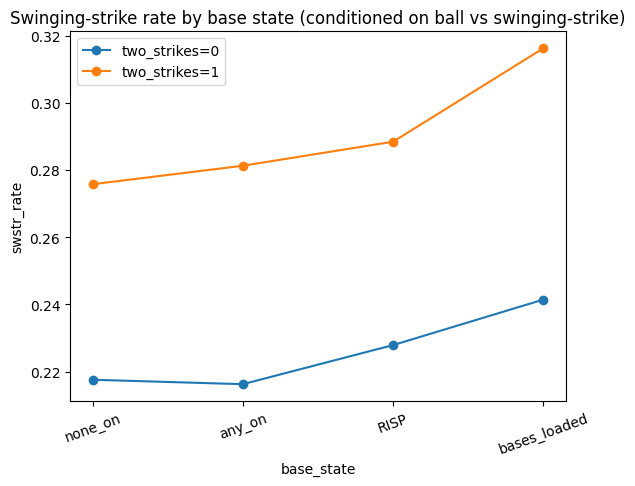

,two_strikes,base_state,n,swstr_rate
0,0,RISP,52016,0.227872
1,0,any_on,44749,0.216228
2,0,bases_loaded,5596,0.241422
3,0,none_on,128309,0.217545
4,1,RISP,23077,0.288426
5,1,any_on,17848,0.281264
6,1,bases_loaded,2305,0.316269
7,1,none_on,60284,0.275761


In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

eda = df_xgb.copy()
eda = eda[eda["target"].isin(["any_ball", "any_swinging_strike"])].copy()

# binary base occupancy flags
eda["on_1b_flag"] = eda["on_1b"].notna().astype(int)
eda["on_2b_flag"] = eda["on_2b"].notna().astype(int)
eda["on_3b_flag"] = eda["on_3b"].notna().astype(int)

eda["any_on"] = ((eda["on_1b_flag"] | eda["on_2b_flag"] | eda["on_3b_flag"]) > 0).astype(int)
eda["risp"]   = ((eda["on_2b_flag"] | eda["on_3b_flag"]) > 0).astype(int)
eda["loaded"] = ((eda["on_1b_flag"] & eda["on_2b_flag"] & eda["on_3b_flag"]) > 0).astype(int)

# mutually exclusive bucket (simple + interpretable)
eda["base_state"] = np.select(
    [eda["loaded"] == 1, eda["risp"] == 1, eda["any_on"] == 1],
    ["bases_loaded", "RISP", "any_on"],
    default="none_on"
)

eda["two_strikes"] = (eda["strikes"] == 2).astype(int)
eda["is_swstr"] = (eda["target"] == "any_swinging_strike").astype(int)

# compute rates
rate = (
    eda.groupby(["two_strikes", "base_state"], observed=True)
       .agg(n=("is_swstr", "size"), swstr_rate=("is_swstr", "mean"))
       .reset_index()
)

# plot
order = ["none_on", "any_on", "RISP", "bases_loaded"]
fig, ax = plt.subplots()

for ts in [0, 1]:
    sub = rate[rate["two_strikes"] == ts].set_index("base_state").reindex(order)
    ax.plot(order, sub["swstr_rate"], marker="o", label=f"two_strikes={ts}")

ax.set_title("Swinging-strike rate by base state (conditioned on ball vs swinging-strike)")
ax.set_ylabel("swstr_rate")
ax.set_xlabel("base_state")
ax.legend()
plt.xticks(rotation=20)
plt.show()

display(rate.sort_values(["two_strikes","base_state"]))


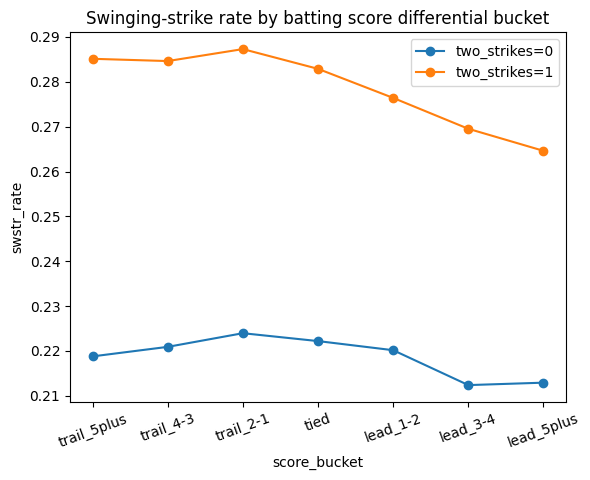

,two_strikes,score_bucket,n,swstr_rate
0,0,trail_5plus,16742,0.218791
1,0,trail_4-3,22416,0.220914
2,0,trail_2-1,46866,0.223958
3,0,tied,59784,0.222200
4,0,lead_1-2,46982,0.220169
5,0,lead_3-4,21936,0.212391
6,0,lead_5plus,15944,0.212933
7,1,trail_5plus,7509,0.285125
8,1,trail_4-3,10428,0.284618
9,1,trail_2-1,21282,0.287285


In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

eda = df_xgb.copy()
eda = eda[eda["target"].isin(["any_ball", "any_swinging_strike"])].copy()

eda["is_swstr"] = (eda["target"] == "any_swinging_strike").astype(int)
eda["two_strikes"] = (eda["strikes"] == 2).astype(int)

# batting team score diff (batting - fielding)
# Top = away batting, Bottom = home batting
batting_diff = np.where(
    eda["inning_topbot"].eq("Top"),
    eda["away_score"] - eda["home_score"],
    eda["home_score"] - eda["away_score"]
)
eda["batting_score_diff"] = batting_diff

# bucket it
bins = [-np.inf, -5, -3, -1, 0, 2, 4, np.inf]
labels = [
    "trail_5plus",
    "trail_4-3",
    "trail_2-1",
    "tied",
    "lead_1-2",
    "lead_3-4",
    "lead_5plus",
]
eda["score_bucket"] = pd.cut(
    eda["batting_score_diff"], bins=bins, labels=labels, include_lowest=True
)


rate = (
    eda.groupby(["two_strikes", "score_bucket"], observed=True)
       .agg(n=("is_swstr","size"), swstr_rate=("is_swstr","mean"))
       .reset_index()
)

order = labels

fig, ax = plt.subplots()
for ts in [0, 1]:
    sub = rate[rate["two_strikes"] == ts].set_index("score_bucket").reindex(order)
    ax.plot(order, sub["swstr_rate"], marker="o", label=f"two_strikes={ts}")

ax.set_title("Swinging-strike rate by batting score differential bucket")
ax.set_ylabel("swstr_rate")
ax.set_xlabel("score_bucket")
ax.legend()
plt.xticks(rotation=20)
plt.show()

display(rate.sort_values(["two_strikes","score_bucket"]))


Model with base state, count, score, handedness matchup, batter-relative release position added

In [171]:
# Cell 1 — Add engineered features (batter-relative release_pos_x & release_pos_z, same_side, base_state, score_bucket, zone_out_dist)

import numpy as np
import pandas as pd

df_model2 = df_xgb.copy()  # df_xgb already has plate_x_batter + dropped null sz_top/sz_bot

# --- matchup ---
df_model2["same_side"] = (df_model2["stand"] == df_model2["p_throws"]).astype("int8")

# --- batter-relative release position (x + z) ---
stand_sign = df_model2["stand"].map({"R": -1, "L": 1})
df_model2["release_pos_x_batter"] = df_model2["release_pos_x"] * stand_sign
df_model2["release_pos_z_batter"] = df_model2["release_pos_z"]  # z doesn't flip with stand

# --- edge distance outside zone (continuous) ---
ZONE_HALF_WIDTH_FT = 0.83
x_out = (df_model2["plate_x"].abs() - ZONE_HALF_WIDTH_FT).clip(lower=0)
z_below = (df_model2["sz_bot"] - df_model2["plate_z"]).clip(lower=0)
z_above = (df_model2["plate_z"] - df_model2["sz_top"]).clip(lower=0)
z_out = np.maximum(z_below, z_above)

df_model2["zone_out_dist"] = np.sqrt(x_out**2 + z_out**2)

# --- base state buckets ---
df_model2["on_1b_flag"] = df_model2["on_1b"].notna().astype("int8")
df_model2["on_2b_flag"] = df_model2["on_2b"].notna().astype("int8")
df_model2["on_3b_flag"] = df_model2["on_3b"].notna().astype("int8")

df_model2["any_on"] = ((df_model2["on_1b_flag"] | df_model2["on_2b_flag"] | df_model2["on_3b_flag"]) > 0).astype("int8")
df_model2["risp"]   = ((df_model2["on_2b_flag"] | df_model2["on_3b_flag"]) > 0).astype("int8")
df_model2["loaded"] = ((df_model2["on_1b_flag"] & df_model2["on_2b_flag"] & df_model2["on_3b_flag"]) > 0).astype("int8")

df_model2["base_state"] = np.select(
    [df_model2["loaded"] == 1, df_model2["risp"] == 1, df_model2["any_on"] == 1],
    ["bases_loaded", "RISP", "any_on"],
    default="none_on"
)

# --- batting score differential bucket (your bins) ---
batting_diff = np.where(
    df_model2["inning_topbot"].eq("Top"),
    df_model2["away_score"] - df_model2["home_score"],
    df_model2["home_score"] - df_model2["away_score"]
)
df_model2["batting_score_diff"] = batting_diff

bins = [-np.inf, -5, -3, -1, 0, 2, 4, np.inf]
labels = ["trail_5plus", "trail_4-3", "trail_2-1", "tied", "lead_1-2", "lead_3-4", "lead_5plus"]
df_model2["score_bucket"] = pd.cut(df_model2["batting_score_diff"], bins=bins, labels=labels, include_lowest=True)

print("df_model2 shape:", df_model2.shape)
print(df_model2[["same_side","release_pos_x_batter","release_pos_z_batter","zone_out_dist","base_state","score_bucket"]].head())


df_model2 shape: (710478, 134)
      same_side  release_pos_x_batter  release_pos_z_batter  zone_out_dist  \
2395          0                  -2.8                  5.59            0.0   
2527          0                  -2.4                   5.9            0.0   
2626          0                 -2.93                  5.56           1.25   
2727          0                 -3.09                  5.55           1.25   
2743          0                 -2.87                  5.58            0.0   

     base_state score_bucket  
2395    none_on  trail_5plus  
2527    none_on  trail_5plus  
2626    none_on  trail_5plus  
2727    none_on  trail_5plus  
2743    none_on  trail_5plus  


In [172]:
# Cell 2 — Features list (same originals + add batter-relative release x/z)

FEATURES_NUM2 = [
    # original numeric set
    "effective_speed", "release_spin_rate", "pfx_x", "pfx_z",
    "plate_x_batter", "plate_z",

    # new engineered numeric
    "zone_out_dist",
    "release_pos_x_batter",
    "release_pos_z_batter",
]

FEATURES_CAT2 = [
    # original cats
    "p_throws", "stand",

    # new cats
    "base_state", "score_bucket",
]

FEATURES2 = FEATURES_NUM2 + FEATURES_CAT2

print("Numeric:", FEATURES_NUM2)
print("Categorical:", FEATURES_CAT2)


Numeric: ['effective_speed', 'release_spin_rate', 'pfx_x', 'pfx_z', 'plate_x_batter', 'plate_z', 'zone_out_dist', 'release_pos_x_batter', 'release_pos_z_batter']
Categorical: ['p_throws', 'stand', 'base_state', 'score_bucket']


In [173]:
# Cell 3 — Rebuild train/test split (same date logic) and label encode

from sklearn.preprocessing import LabelEncoder

# Use the same date split you chose
train_end  = pd.Timestamp("2023-08-31")
test_start = pd.Timestamp("2023-09-01")
test_end   = pd.Timestamp("2023-09-30")

# Ensure game_date exists + is datetime
df_model2["game_date"] = pd.to_datetime(df_model2["game_date"], errors="coerce")
df_model2 = df_model2.dropna(subset=["game_date"]).copy()

train_df2 = df_model2[df_model2["game_date"] <= train_end].copy()
test_df2  = df_model2[(df_model2["game_date"] >= test_start) & (df_model2["game_date"] <= test_end)].copy()

# Drop rows missing features/target
train_df2 = train_df2.dropna(subset=FEATURES2 + ["target"]).copy()
test_df2  = test_df2.dropna(subset=FEATURES2 + ["target"]).copy()

# Label encode
le2 = LabelEncoder()
y_train2_enc = le2.fit_transform(train_df2["target"])
y_test2_enc  = le2.transform(test_df2["target"])

print("Train rows:", len(train_df2), "Test rows:", len(test_df2))
print("Label classes:", list(le2.classes_))
print("\nTrain target counts:\n", train_df2["target"].value_counts())
print("\nTest target counts:\n", test_df2["target"].value_counts())


Train rows: 580156 Test rows: 121648
Label classes: ['any_ball', 'any_swinging_strike', 'called_strike', 'foul', 'hit_by_pitch', 'hit_into_play']

Train target counts:
 target
any_ball               207587
foul                   108978
hit_into_play          100913
called_strike           95861
any_swinging_strike     65109
hit_by_pitch             1708
Name: count, dtype: int64

Test target counts:
 target
any_ball               43709
foul                   23332
hit_into_play          20849
called_strike          19707
any_swinging_strike    13698
hit_by_pitch             353
Name: count, dtype: int64


In [179]:
# Cell 4 — XGBoost fit (same hyperparams as before)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

X_train2 = train_df2[FEATURES2]
X_test2  = test_df2[FEATURES2]

preprocess2 = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), FEATURES_CAT2),
    ],
    remainder="passthrough"
)

xgb2 = XGBClassifier(
    objective="multi:softprob",
    num_class=len(le2.classes_),
    eval_metric="mlogloss",
    n_estimators=600,
    learning_rate=0.07,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    tree_method="hist",
    n_jobs=-1,
    random_state=42
)

model_xgb2 = Pipeline(steps=[
    ("preprocess", preprocess2),
    ("xgb", xgb2)
])

model_xgb2.fit(X_train2, y_train2_enc)

print("Label classes:", list(le2.classes_))


Label classes: ['any_ball', 'any_swinging_strike', 'called_strike', 'foul', 'hit_by_pitch', 'hit_into_play']


In [180]:
# Cell 5 — Score + confusion + share comparison (same as before)

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

y_pred2_enc = model_xgb2.predict(X_test2)
y_proba2 = model_xgb2.predict_proba(X_test2)

y_pred2 = le2.inverse_transform(y_pred2_enc)
y_test2_str = test_df2["target"].values

acc2 = accuracy_score(y_test2_str, y_pred2)
ll2  = log_loss(y_test2_enc, y_proba2, labels=np.arange(len(le2.classes_)))

y_test2_bin = label_binarize(y_test2_enc, classes=np.arange(len(le2.classes_)))
auc2_ovr = roc_auc_score(y_test2_bin, y_proba2, average="macro", multi_class="ovr")
auc2_ovo = roc_auc_score(y_test2_bin, y_proba2, average="macro", multi_class="ovo")

print("=== XGB (added game state + edge distance + batter-rel release) ===")
print("Accuracy:", acc2)
print("LogLoss:", ll2)
print("ROC AUC (ovr):", auc2_ovr)
print("ROC AUC (ovo):", auc2_ovo)

print("\nClassification report:")
print(classification_report(y_test2_str, y_pred2, digits=3, zero_division=0))

print("\nConfusion matrix (rows=true, cols=pred):")
cm2 = confusion_matrix(y_test2_str, y_pred2, labels=le2.classes_)
print(pd.DataFrame(cm2, index=le2.classes_, columns=le2.classes_))

true_share2 = pd.Series(y_test2_str).value_counts(normalize=True).rename("true_share")
pred_share2 = pd.Series(y_pred2).value_counts(normalize=True).rename("pred_share")
share_cmp2 = pd.concat([true_share2, pred_share2], axis=1).fillna(0.0).sort_values("true_share", ascending=False)

print("\nTrue vs Predicted shares:")
print(share_cmp2)


=== XGB (added game state + edge distance + batter-rel release) ===
Accuracy: 0.551369525187426
LogLoss: 1.0510348936107203
ROC AUC (ovr): 0.8423702236817646
ROC AUC (ovo): 0.8423702236817646

Classification report:
                     precision    recall  f1-score   support

           any_ball      0.728     0.923     0.814     43709
any_swinging_strike      0.339     0.067     0.112     13698
      called_strike      0.450     0.498     0.473     19707
               foul      0.385     0.313     0.345     23332
       hit_by_pitch      0.599     0.266     0.369       353
      hit_into_play      0.381     0.412     0.396     20849

           accuracy                          0.551    121648
          macro avg      0.480     0.413     0.418    121648
       weighted avg      0.513     0.551     0.517    121648


Confusion matrix (rows=true, cols=pred):
                     any_ball  any_swinging_strike  called_strike  foul  \
any_ball                40360                  636    

In [ ]:
# Feature importance (gain + permutation; optional SHAP)
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance

# ----- 1) Get post-transform feature names from ColumnTransformer -----
pre = model_xgb2.named_steps["preprocess"]
xgb = model_xgb2.named_steps["xgb"]

# ColumnTransformer has: OneHotEncoder on FEATURES_CAT2, passthrough for numeric
ohe = pre.named_transformers_["cat"]

cat_feature_names = ohe.get_feature_names_out(FEATURES_CAT2)
num_feature_names = np.array(FEATURES_NUM2)  # passthrough numeric order is preserved

feature_names = np.concatenate([cat_feature_names, num_feature_names])

# ----- 2) XGBoost built-in importance ("gain") -----
gain = xgb.feature_importances_  # corresponds to transformed columns
imp_gain = (
    pd.DataFrame({"feature": feature_names, "gain_importance": gain})
      .sort_values("gain_importance", ascending=False)
      .reset_index(drop=True)
)

print("Top 30 features by XGB gain importance:")
display(imp_gain.head(30))

# Optional: aggregate OHE back to original columns (so you can see if e.g. base_state dominates)
def root_name(f):
    # OHE names look like "base_state_RISP" etc -> root is "base_state"
    return f.split("_")[0] if f.split("_")[0] in FEATURES_CAT2 else f

imp_gain["root_feature"] = imp_gain["feature"].map(root_name)
imp_gain_root = (
    imp_gain.groupby("root_feature", as_index=False)["gain_importance"]
            .sum()
            .sort_values("gain_importance", ascending=False)
            .reset_index(drop=True)
)

print("\nAggregated gain importance by original feature:")
display(imp_gain_root)

# ----- 3) Permutation importance on test set (uses original X_test2; pipeline handles transforms) -----
# This is slower; keep repeats small at first
perm = permutation_importance(
    model_xgb2,
    X_test2,
    y_test2_enc,
    n_repeats=3,
    random_state=42,
    scoring="neg_log_loss",  # aligns with your objective
    n_jobs=-1,
)

imp_perm = (
    pd.DataFrame({"feature": FEATURES2, "perm_importance_mean": perm.importances_mean,
                  "perm_importance_std": perm.importances_std})
      .sort_values("perm_importance_mean", ascending=False)
      .reset_index(drop=True)
)

print("\nPermutation importance (neg_log_loss): higher = more important")
display(imp_perm)


Top 30 features by XGB gain importance:


,feature,gain_importance
0,zone_out_dist,0.527542
1,stand_L,0.059150
2,plate_x_batter,0.053400
3,stand_R,0.051268
4,plate_z,0.045929
5,pfx_z,0.028938
6,p_throws_R,0.021551
7,p_throws_L,0.020501
8,effective_speed,0.019928
9,pfx_x,0.017808



Aggregated gain importance by original feature:


,root_feature,gain_importance
0,zone_out_dist,0.527542
1,stand,0.110418
2,plate_x_batter,0.053400
3,plate_z,0.045929
4,pfx_z,0.028938
5,p_throws_R,0.021551
6,p_throws_L,0.020501
7,effective_speed,0.019928
8,pfx_x,0.017808
9,release_pos_x_batter,0.015792



Permutation importance (neg_log_loss): higher = more important


,feature,perm_importance_mean,perm_importance_std
0,zone_out_dist,0.525295,0.003302
1,plate_z,0.396767,0.000476
2,plate_x_batter,0.268108,0.001700
3,pfx_z,0.074849,0.000712
4,pfx_x,0.039840,0.000315
5,effective_speed,0.025529,0.000254
6,stand,0.021679,0.000152
7,release_pos_x_batter,0.019584,0.000721
8,release_spin_rate,0.006754,0.000170
9,release_pos_z_batter,0.006055,0.000273
